In [26]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.utils import load_img
from keras.models import load_model
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
import os

In [20]:
target_size = (224,224)
test_images = []
image_folder = 'images'
for id, image in enumerate(os.listdir(image_folder)):
    if image.endswith('.png') or image.endswith('.jpg') or image.endswith('.jpeg'):
        test_images.append(np.array(load_img(f"{image_folder}/{image}", target_size=target_size)))
        # print(test_images[id].shape)
images = np.asarray(test_images)
images.shape

(7, 224, 224, 3)

In [22]:
X = preprocess_input(images)

In [21]:
model = load_model(filepath='models/2023-07-23_15-45-38_vgg_dense_softmax_lossbinary_crossentropy_batch32_steps63/2023-07-23_15-45-38_vgg_dense_softmax_lossbinary_crossentropy_batch32_steps63_25.h5')
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

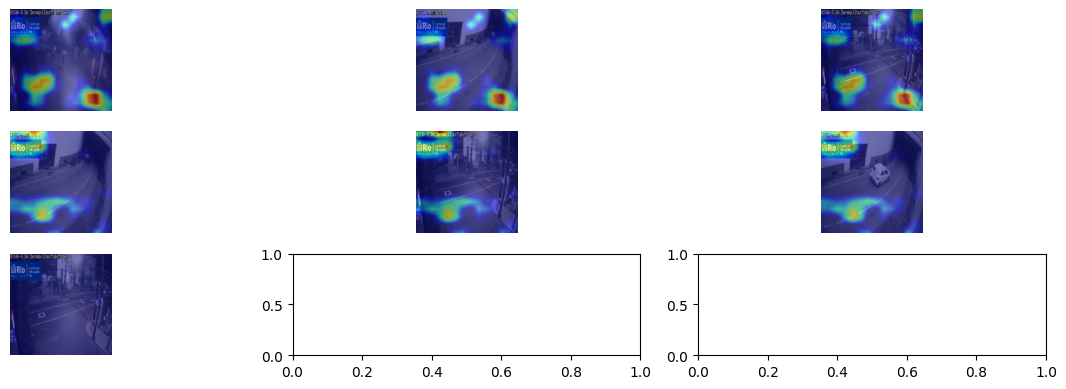

In [44]:
replace2linear = ReplaceToLinear()
score = CategoricalScore([0,1])

gc = Gradcam(model, model_modifier=replace2linear,clone=True)
cam = gc(score, X,penultimate_layer=-1)

rows = 3
cols = int(len(images)/rows) +1
f, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 4))
id = 0
for i in range(rows):
    for j in range(cols):
        id += 1
        if id > len(images):
            break
        heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
        # ax[i].set_title(title, fontsize=16)
        ax[i,j].imshow(images[i+j])
        ax[i,j].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
        ax[i,j].axis('off')
plt.tight_layout()
plt.show()